Goal: use PyTorch's machine learning model to progressively develop a best-fit line for a given set of data points<br>
Like most linear regression algorithms, we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.


<img src='../Images/linear-regression-residuals.png' width='400' style="display: inline-block"><br>

Image source: <a href='https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png'>https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png</a>

To start, we'll develop a collection of data points that appear random, but that fit a known linear equation $y = 2x+1$


In [28]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#create a column matrix of X values
x = torch.linspace(1,50,50).reshape(-1,1)
# x= torch.unsqueeze(torch.linspace(1,50,50), dim = 1) #equivalent

In [30]:
# Create a "random" array of error values
# We want 50 random integer values that collectively cancel each other out.
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [31]:
# Create a column matrix of y values
# set weight =2, bias =1, e (error)
y = 2*x + 1 + e
print(y.shape)

torch.Size([50, 1])


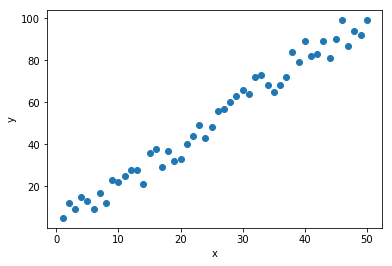

In [32]:
#plot result
# >> have to convert tensors to Numpy arrays just for 
plt.scatter(x.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

 {weight} = 2,\; \mathrm {bias} = 1$

Khi tạo tensor x, không set requires_grad=True
Điều này có nghĩa là, y không có hàm gradient và y.backward() không hoạt động. 

## Simple linear model
As a quick demonstration we'll show how the built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.

In [33]:
torch.manual_seed(59)
#linear used here doesn't really refer to linear regression.
#linear layer cũng được gọi là 'fully connected' hoặc 'dense' layer
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)
#ko có data, model set ngẫu nhiên weight=0.1060 và bias =0.9638

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


## Model classes

In [34]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
       
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [35]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


### Pass a tensor into the model 

In [36]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<AddBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$